### Угадываем признак

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [4]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [5]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [6]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [7]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [10]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [11]:
y = data['sex']

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [13]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])


In [14]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(20)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0
5,1.80,67.0,0,0,0
6,2.05,98.0,0,0,1
7,1.93,100.0,0,0,0
8,1.80,62.0,0,0,0
9,1.65,54.0,0,0,0


In [15]:
le.fit( data['sex'] )

LabelEncoder()

In [16]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [17]:
model = LogisticRegression()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
y_train

10570    1
6940     0
5675     0
7630     1
1910     0
        ..
1273     1
8801     1
6268     0
10510    1
7253     1
Length: 7600, dtype: int32

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import roc_curve

In [21]:
predictions = model.predict_proba(X_test)

In [22]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [23]:
from matplotlib import pyplot as plt

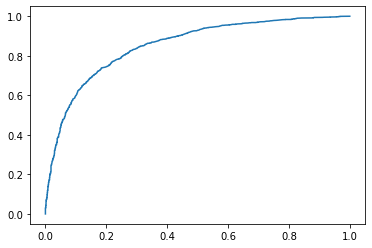

In [24]:
plt.plot( fpr, tpr )

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
roc_auc_score(y_test, predictions[:, 1])

0.8524313459260147

### Домашнее задание

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.


    Построить график Precision - Recall на этих же данных.



In [27]:
def roc_(*args):
        tp = 0 # True positive
        fp = 0 # False positive
        fn = 0 # False negative
        tn = 0 # True negative

        predictions = model.predict_proba( X_test )
        for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
            if predicted_prob >= args:
                predicted = 1
            else:
                predicted = 0

            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1

            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
        return tp, fp, fn, tn

In [28]:
#a = np.array([roc_(0.9), roc_(0.8),roc_(0.7), roc_(0.6), roc_(0.5), roc_(0.4), roc_(0.3), 
#              roc_(0.2), roc_(0.1)])


z = np.linspace(0.01, 0.999, num=100)
t = []
for z in z:
    #print(z)
    t.append(roc_(z))
t = np.array(t)
type(t)

numpy.ndarray

In [34]:
tpr2 = []
fpr2 = []
for tp, fp, fn, tn in t:
    tp_ratio = tp/(tp+fp)
    tpr2.append(tp_ratio)
    fp_ratio = fp/(fp+tn)
    fpr2.append(fp_ratio)
tpr2 = np.array(tpr2)
fpr2 = np.array(fpr2)
#print(tpr2)
#print(fpr2)

In [39]:
fpr2=(fpr2[::-1])

In [47]:
tpr2

array([0.54788214, 0.54821867, 0.55041628, 0.55211878, 0.55541719,
       0.55908234, 0.5630545 , 0.56628426, 0.57073955, 0.57743724,
       0.58305867, 0.59071166, 0.59392917, 0.6005472 , 0.60735345,
       0.61349262, 0.61965812, 0.62522523, 0.63157895, 0.63780984,
       0.64476155, 0.65368461, 0.66187888, 0.66890557, 0.67547019,
       0.68250102, 0.68719212, 0.69125   , 0.69750739, 0.7035284 ,
       0.70718954, 0.71157244, 0.7188484 , 0.72396544, 0.72940635,
       0.73598131, 0.7408811 , 0.75108959, 0.7577548 , 0.75996016,
       0.76461694, 0.76887755, 0.77419355, 0.78256247, 0.78359417,
       0.78806134, 0.79210673, 0.79391892, 0.79703535, 0.80405797,
       0.80893592, 0.81085919, 0.81348724, 0.82083075, 0.82963901,
       0.83161954, 0.83605487, 0.83885942, 0.84402431, 0.84752747,
       0.85244755, 0.85409253, 0.85755604, 0.86176471, 0.86676647,
       0.86916603, 0.87460815, 0.87580128, 0.87963726, 0.88370119,
       0.88859878, 0.88928893, 0.89367553, 0.89753321, 0.89922

In [36]:
model = LogisticRegression()

In [37]:
fpr2 = fpr2.reshape(-1,1)
#tpr2 = tpr2.reshape(-1,1)

In [40]:
#model.fit(fpr2, tpr2)

Text(0.5, 1.0, 'ROC AUC')

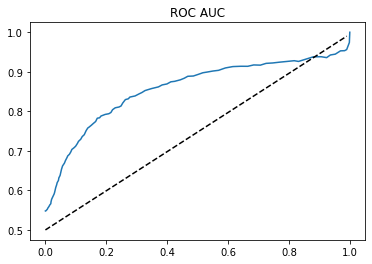

In [48]:
plt.plot(fpr2, tpr2)
plt.plot([0., .99], [0.5, .99], 'k--')
plt.title('ROC AUC')

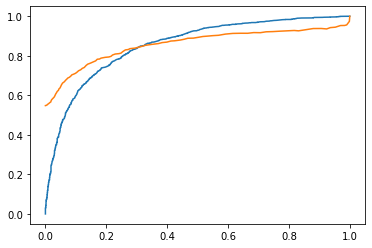

In [50]:
plt.plot( fpr, tpr )
plt.plot(fpr2, tpr2)

# оранжевая кривая сделана руками, синяя сделана функцией sklearn
Я вижу что не совпадает. Вы также видите, что у меня не получается и я застрял на этом задании безнадежно. 
 Вы как опытный преподаватель должны такие вещи замечать и давать правильную подсказку, которая просветит ученика и ученик поймет где именно допускает ошибку. 
  Вы же просто отправляете назад с комментарием "это не правильный ответ, переделывай!" - это дилетантский подход. Надо содействовать. От того что я потрачу 12 часов на поиск ответа я лучше материал не усвою. Не превращате Нетологию в отсталую Российскую армию где калечат нормальных людей, а не подготавливают физически как в Швеции. 

In [42]:
from sklearn.metrics import recall_score, precision_score

In [43]:
from sklearn.metrics import auc

In [ ]:
#      AUC

auc( fpr2, tpr2 )

###### Precision-Recal curve

Precision () is defined as the number of true positives () over the number of true positives plus the number of false positives (

).

Recall () is defined as the number of true positives () over the number of true positives plus the number of false negatives ().

In [ ]:
precision = []
recall = []
for tp, fp, fn, tn in t:
    precision_ratio = tp/(tp+fp)
    precision.append(precision_ratio) 
    recall_ratio = tp/(tp+fn)
    recall.append(recall_ratio)
precision = np.array(precision) 
recall = np.array(recall)

In [ ]:
recall=(recall[::-1])

In [ ]:
plt.plot(precision, recall)

In [ ]:
#    F- score
R = sum(recall)/len(recall)
P = sum(precision)/len(precision)
F1 = 2* ((P*R)/(P+R))
print('F-score данной функции=  ', F1)